# Predicting Heart Disease

The dataset for this project is downloaded from Kaggle:
https://www.kaggle.com/ronitf/heart-disease-uci

The goal of the project is building an ML model that predicts the presence of heart disease in the patient.

In [680]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, auc, roc_curve, confusion_matrix
from sklearn.inspection import permutation_importance

## Load in the Data Set

Columns description:

- age
- sex
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: refers to the presence of heart disease in the patient (1=yes, 0=no)

In [681]:
heart_df = pd.read_csv('./data/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [682]:
heart_df.shape

(303, 14)

There are 303 patients and 14 attributes, one of them is the target column, which indicates the presence of heart disease.

In [683]:
# summary statistics
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [684]:
# Basic information
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values in the data.

In [685]:
heart_df.duplicated().sum() 

1

There is one duplicated row. We need to remove it.

In [686]:
heart_df.drop_duplicates(inplace=True)
heart_df.shape[0]

302

We want to make sure that we are training our random forest models on balanced data. In the following cell, we see how many examples of healthy and diseased hears we have.

Healthy: 138
Heart Diesease: 164
Total: 302


Text(0.5, 1.0, 'Percent for each Example Class')

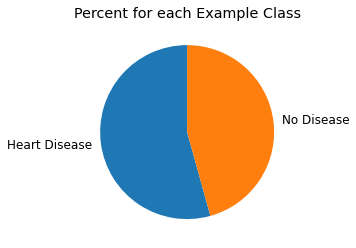

In [687]:
# number of diseased examples
disease = len(heart_df[heart_df['target'] == 1])
# number of healthy examples
no_disease = len(heart_df[heart_df['target']== 0])

# print the number of healthy samples
print("Healthy:",no_disease)
# print the number of diseased samples
print("Heart Diesease:",  disease )
print("Total:",  no_disease + disease )

# Make a Pie chart to represent how many example we have in each class
plt.pie([disease, no_disease], labels=['Heart Disease', 'No Disease'], startangle=90)
plt.title('Percent for each Example Class')

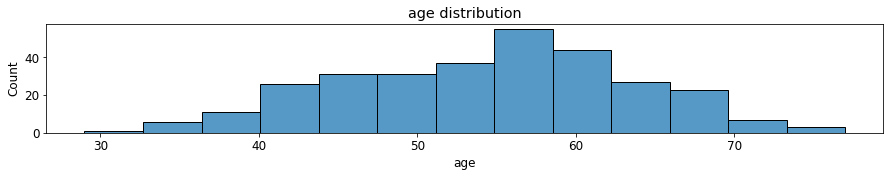

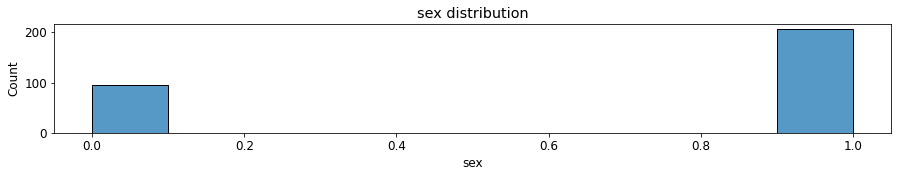

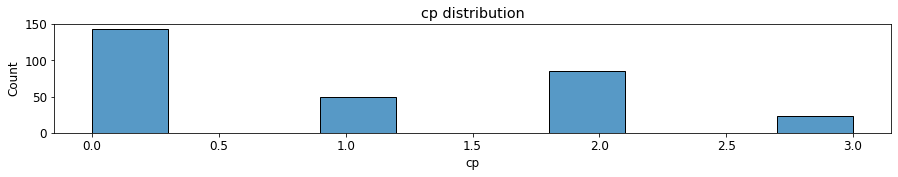

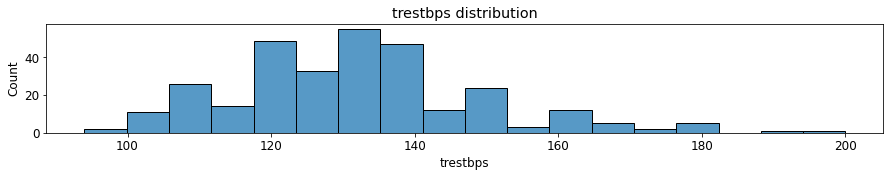

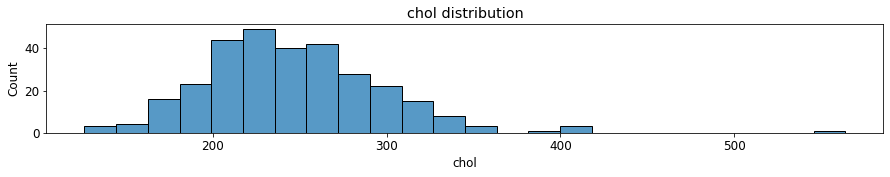

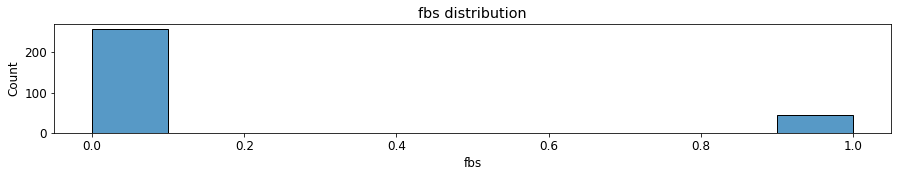

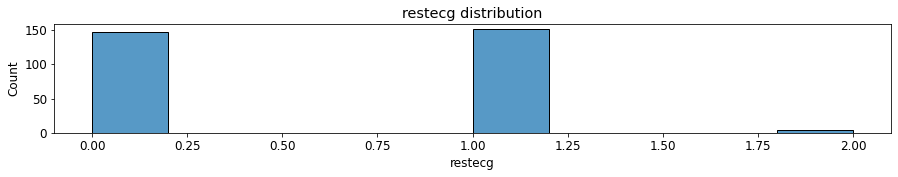

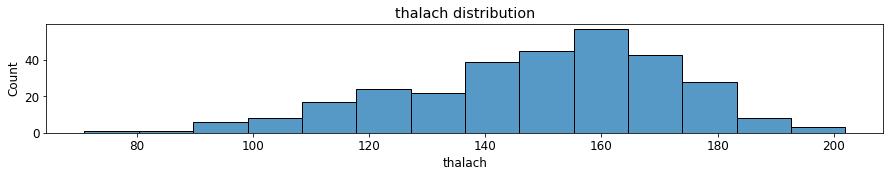

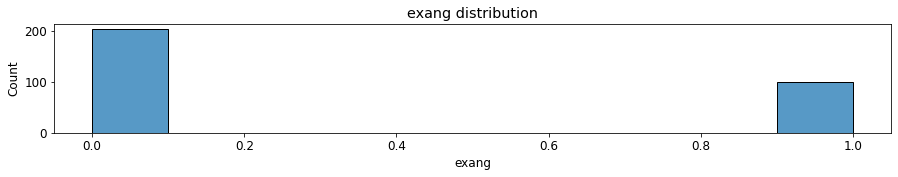

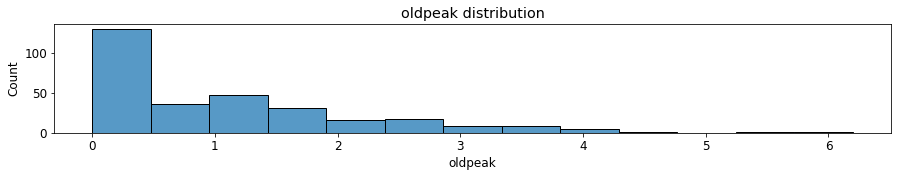

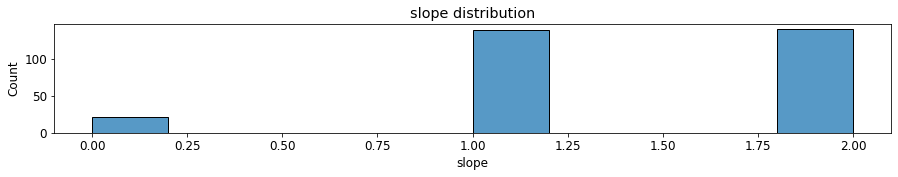

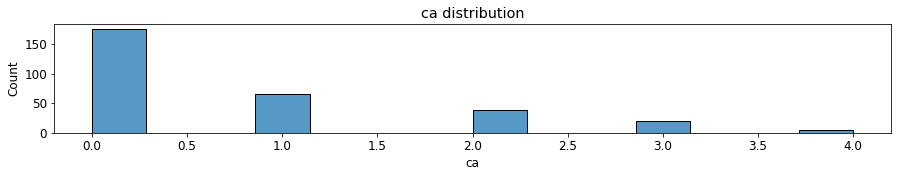

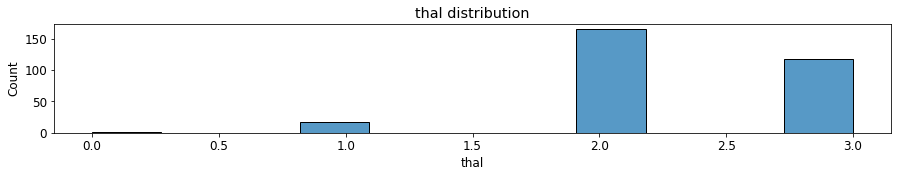

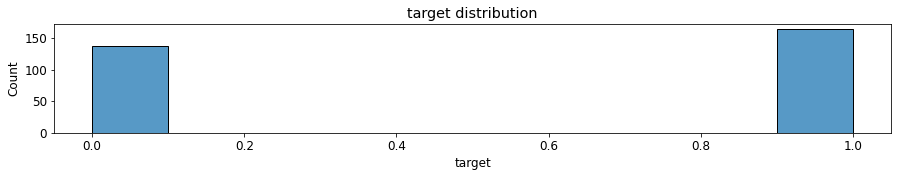

In [688]:
for col in heart_df.columns:
    plt.figure(figsize=(15, 2))
    sns.histplot(heart_df[col])
    plt.title(col+" distribution")
    plt.show()

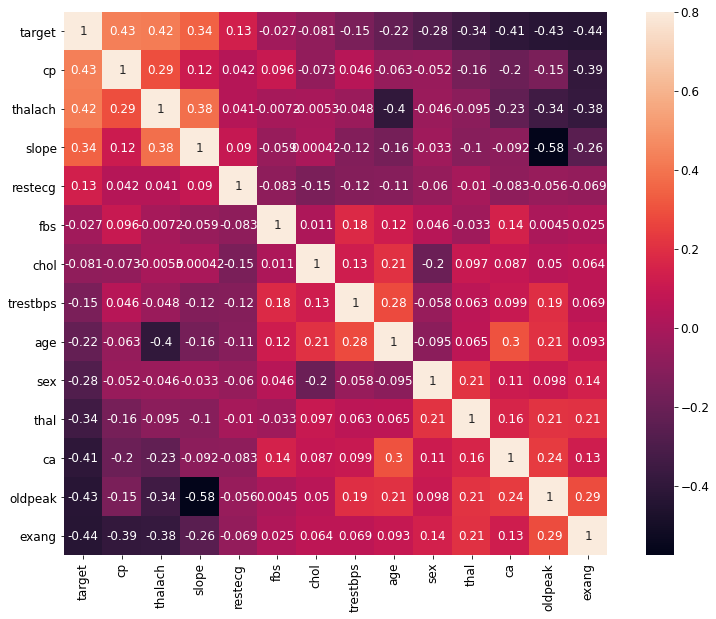

In [689]:
corrmat = heart_df.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(heart_df[cols].corr(), vmax=.8, square=True, annot = True);

From the heatmap, it seems like the features "fbs", "chol", "trestbps" and 
"restecg" are not too much correlated to the target.

The next step is to seperate our data into the feature vectors and the labels.

In [690]:
# Extract feature vectors and labels
X = heart_df.drop('target',1)
y = heart_df['target']

# Convert from pandas objects to numpy objects
X = X.values
y = y.values

Now that we have split the data into feature vectors and labels, we need to split it into a training data set and a testing data set.

In [691]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Cross Validation

In general, for health problems, we will be more concerned about not missing any positive cases. If a patient has heart disease, we want to correctly predict that the patient has the disease. It is less of a concerning situation if the model is predicting positive when in reality the patient is healthy. So, our main focus in terms of evaluation metrics is the sensitivity, which is the proportion of actual positive cases that are corrrectly identified. 

The function below, k_fold_cross_validation takes any model as input and calculates the mean and standard deviation of sensitivity scores in k folds.

In [692]:
def k_fold_cross_validation(X, y, k, model):
    # accuracy for each fold
    sensitivity = np.zeros((k,1))
    accuracy = np.zeros((k,1))
    f1score = np.zeros((k,1))
    
    # fold count
    fold = 0
    
    # split the data into training and validation sets
    skf = StratifiedKFold(n_splits = k)
    
    for train_indices, test_indices in skf.split(X,y):
        
        # Get the training and validation data sets
        X_train_cv, X_validation = X[train_indices], X[test_indices]
        Y_train_cv, Y_validation = y[train_indices], y[test_indices]

        # Train the model on the training data
        model.fit(X_train_cv,  Y_train_cv)

        # Get the predictions from the validation data
        predictions = model.predict(X_validation)
                
        # Calculate the tpr
        fpr, tpr, thresholds = roc_curve(Y_validation, predictions)
        acc = accuracy_score(Y_validation, predictions)
        f1 = f1_score(Y_validation, predictions)

        sensitivity[fold] = tpr[1]
        accuracy[fold] = acc
        f1score[fold] = f1
        fold += 1
        
    return np.mean(sensitivity), np.std(sensitivity), np.mean(accuracy), np.mean(f1score)

# Create a Decision Tree Classifier

In [693]:
# Building Decision Tree
dt = DecisionTreeClassifier(random_state = 42)

In [694]:
# Evaluation on Training set

k = 5
# Call the cross fold validation function
mean_sensitivity_train, std_sensitivity_train, accuracy_train, f1score_train = k_fold_cross_validation( X_train, y_train, k, dt)
mean_sensitivity_test, std_sensitivity_test, accuracy_test, f1score_test = k_fold_cross_validation( X_test, y_test  , k, dt)

In [695]:
results_df = pd.DataFrame(data=[["Default Decision Tree", mean_sensitivity_train, mean_sensitivity_test, accuracy_train, accuracy_test, f1score_train, f1score_test]], 
                          columns=['Model', 'Training Sensitivity', 'Testing Sensitivity', 'Training Accuracy', 'Testing Accuracy', 'Training F1 Score', 'Testing F1 Score'])
results_df

,Model,Training Sensitivity,Testing Sensitivity,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Default Decision Tree,0.735185,0.686667,0.746769,0.755128,0.766285,0.691429


## Tuning Hyper Parameters for Decision Tree

Search for the optimal values

In [696]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
k = 5

max_sensitivity_mean = 0
max_sensitivity_std = 0
best_num_estimators = 0
best_max_depth = 0

for depth in max_depths:
    for split in min_samples_splits:
        
        rf = DecisionTreeClassifier(max_depth=depth, min_samples_split=split)
        
        sensitivity, std, accuracy, f1score = k_fold_cross_validation( X_train  , y_train  ,  k , dt)
        
        if sensitivity >  max_sensitivity_mean :
            max_sensitivity_mean = sensitivity
            max_sensitivity_std = std
            best_min_samples_split = split
            best_max_depth = depth
            
print('Maximum sensitivity Mean:', max_sensitivity_mean)
print('Maximum sensitivity Standard Deviation:', max_sensitivity_std)
print('Minimum Samples Split:', best_min_samples_split)
print('Maximum Depth:', best_max_depth)

Maximum sensitivity Mean: 0.7351851851851852
Maximum sensitivity Standard Deviation: 0.06819241718341472
Minimum Samples Split: 0.1
Maximum Depth: 1.0


# Evaluate Optimized Decision Tree

In [697]:
# best parameters 
dt = RandomForestClassifier(min_samples_split= best_min_samples_split , max_depth = best_max_depth)

# Evaluation on Training set

k = 5
# Call the cross fold validation function
mean_sensitivity_train, std_sensitivity_train, accuracy_train, f1score_train = k_fold_cross_validation( X_train, y_train, k, dt)
mean_sensitivity_test, std_sensitivity_test, accuracy_test, f1score_test = k_fold_cross_validation( X_test, y_test  , k, dt)

In [698]:
results_df_2 = pd.DataFrame(data=[["Optimized Decision Tree", mean_sensitivity_train, mean_sensitivity_test, accuracy_train, accuracy_test, f1score_train, f1score_test]], 
                          columns=['Model', 'Training Sensitivity', 'Testing Sensitivity', 'Training Accuracy', 'Testing Accuracy', 'Training F1 Score', 'Testing F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Sensitivity,Testing Sensitivity,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Default Decision Tree,0.735185,0.686667,0.746769,0.755128,0.766285,0.691429
1,Optimized Decision Tree,0.940741,0.786667,0.808929,0.821795,0.848055,0.795152


# Create a Random Forest Classifier

In [699]:
# Set the parameters of the RandomForestClassifier
rf = RandomForestClassifier(n_estimators =  10 , max_depth =  4 )

Test the model using this cross fold validation function

In [700]:
# Evaluation on Training set

k = 5
# Call the cross fold validation function
mean_sensitivity_train, std_sensitivity_train, accuracy_train, f1score_train = k_fold_cross_validation( X_train, y_train, k, rf)
mean_sensitivity_test, std_sensitivity_test, accuracy_test, f1score_test = k_fold_cross_validation( X_test, y_test  , k, rf)

In [701]:
results_df_2 = pd.DataFrame(data=[["Default Random Forest", mean_sensitivity_train, mean_sensitivity_test, accuracy_train, accuracy_test, f1score_train, f1score_test]], 
                          columns=['Model', 'Training Sensitivity', 'Testing Sensitivity', 'Training Accuracy', 'Testing Accuracy', 'Training F1 Score', 'Testing F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Sensitivity,Testing Sensitivity,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Default Decision Tree,0.735185,0.686667,0.746769,0.755128,0.766285,0.691429
1,Optimized Decision Tree,0.940741,0.786667,0.808929,0.821795,0.848055,0.795152
2,Default Random Forest,0.808466,0.860000,0.771599,0.803846,0.798626,0.805455


## Tuning Hyper Parameters for Random Forest

Search for the optimal values

In [702]:
num_estimators = [2, 4, 6, 8, 10, 15, 20, 30]

max_depth = [2, 4, 6, 8, 12]

k = 5

max_sensitivity_mean = 0
max_sensitivity_std = 0
best_num_estimators = 0
best_max_depth = 0

for num_estimator in num_estimators:
    for depth in max_depth:
        
        rf = RandomForestClassifier(n_estimators=num_estimator, max_depth=depth)
        
        sensitivity, std, accuracy, f1score = k_fold_cross_validation( X_train  , y_train  ,  k , rf  )
        
        if sensitivity >  max_sensitivity_mean :
            max_sensitivity_mean = sensitivity
            max_sensitivity_std = std
            best_num_estimators = num_estimator
            best_max_depth = depth
            
print('Maximum sensitivity Mean:', max_sensitivity_mean)
print('Maximum sensitivity Standard Deviation:', max_sensitivity_std)
print('Number of Estimators:', best_num_estimators)
print('Maximum Depth:', best_max_depth)

Maximum sensitivity Mean: 0.9259259259259259
Maximum sensitivity Standard Deviation: 0.04057204129667899
Number of Estimators: 20
Maximum Depth: 2


# Evaluate Optimized Random Forest Classifier


In [703]:
# best parameters 
rf = RandomForestClassifier(n_estimators = best_num_estimators , max_depth = best_max_depth)

# Evaluation on Training set

k = 5
# Call the cross fold validation function
mean_sensitivity_train, std_sensitivity_train, accuracy_train, f1score_train = k_fold_cross_validation( X_train, y_train, k, rf)
mean_sensitivity_test, std_sensitivity_test, accuracy_test, f1score_test = k_fold_cross_validation( X_test, y_test  , k, rf)

In [704]:
results_df_2 = pd.DataFrame(data=[["Optimized Random Forest", mean_sensitivity_train, mean_sensitivity_test, accuracy_train, accuracy_test, f1score_train, f1score_test]], 
                          columns=['Model', 'Training Sensitivity', 'Testing Sensitivity', 'Training Accuracy', 'Testing Accuracy', 'Training F1 Score', 'Testing F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Sensitivity,Testing Sensitivity,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Default Decision Tree,0.735185,0.686667,0.746769,0.755128,0.766285,0.691429
1,Optimized Decision Tree,0.940741,0.786667,0.808929,0.821795,0.848055,0.795152
2,Default Random Forest,0.808466,0.860000,0.771599,0.803846,0.798626,0.805455
3,Optimized Random Forest,0.911376,0.900000,0.813095,0.852564,0.846424,0.851109


### Visualizing features importances

`feature_importance_` attribute is used to rank the significance of each feature based on the gini index. The overall rank order of the features will tell us about the feature importances.

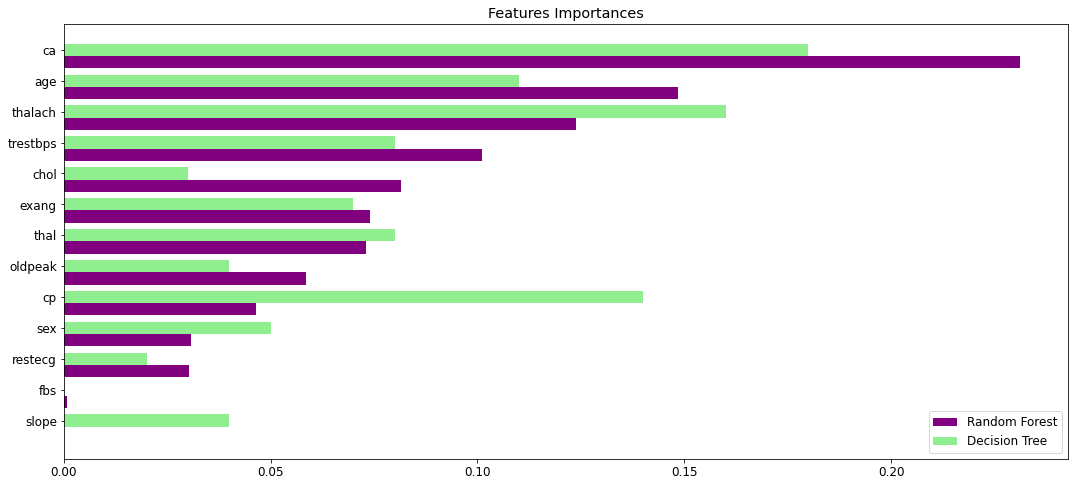

In [705]:
feature_importance=pd.DataFrame({
                                'rf':rf.feature_importances_,
                                'dt':dt.feature_importances_},
                                index=heart_df.drop('target',1).columns)
feature_importance.sort_values(by='rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rf_feature=ax.barh(index,feature_importance['rf'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
plt.title('Features Importances')
ax.legend(loc='lower right')
plt.show()

### Feature Engineering

Let's see if dropping some of the features will help in increasing model performance. According to feature importances, the features "fbs" and "slope" has little to no importance compared to others, so we will try removing these features and build a new random forest model.

In [712]:
heart_df2 = heart_df[['thal','ca','oldpeak','thalach','exang','target','trestbps','chol', 'age', 'cp', 'sex', 'restecg']]

In [708]:
# Extract feature vectors and labels
X = heart_df2.drop('target',1)
y = heart_df2['target']

# Convert from pandas objects to numpy objects
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [709]:
num_estimators = [2, 4, 6, 8, 10, 15, 30, 40]

max_depth = [2, 4, 6, 8, 12]

k = 5

max_sensitivity_mean = 0
max_sensitivity_std = 0
best_num_estimators = 0
best_max_depth = 0

for num_estimator in num_estimators:
    for depth in max_depth:
        
        rf = RandomForestClassifier(n_estimators=num_estimator, max_depth=depth)
        
        sensitivity, std, accuracy, f1score = k_fold_cross_validation( X_train  , y_train  ,  k , rf  )
        
        if sensitivity >  max_sensitivity_mean :
            max_sensitivity_mean = sensitivity
            max_sensitivity_std = std
            best_num_estimators = num_estimator
            best_max_depth = depth
            
print('Maximum sensitivity Mean:', max_sensitivity_mean)
print('Maximum sensitivity Standard Deviation:', max_sensitivity_std)
print('Number of Estimators:', best_num_estimators)
print('Maximum Depth:', best_max_depth)

Maximum sensitivity Mean: 0.9259259259259258
Maximum sensitivity Standard Deviation: 0.05237828008789241
Number of Estimators: 40
Maximum Depth: 2


In [710]:
# best parameters 
rf = RandomForestClassifier(n_estimators = best_num_estimators , max_depth = best_max_depth)

# Evaluation on Training set

k = 5
# Call the cross fold validation function
mean_sensitivity_train, std_sensitivity_train, accuracy_train, f1score_train = k_fold_cross_validation( X_train, y_train, k, rf)
mean_sensitivity_test, std_sensitivity_test, accuracy_test, f1score_test = k_fold_cross_validation( X_test, y_test  , k, rf)

In [711]:
results_df_2 = pd.DataFrame(data=[["Optimized Random Forest with Less Features", mean_sensitivity_train, mean_sensitivity_test, accuracy_train, accuracy_test, f1score_train, f1score_test]], 
                          columns=['Model', 'Training Sensitivity', 'Testing Sensitivity', 'Training Accuracy', 'Testing Accuracy', 'Training F1 Score', 'Testing F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Sensitivity,Testing Sensitivity,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Default Decision Tree,0.735185,0.686667,0.746769,0.755128,0.766285,0.691429
1,Optimized Decision Tree,0.940741,0.786667,0.808929,0.821795,0.848055,0.795152
2,Default Random Forest,0.808466,0.860000,0.771599,0.803846,0.798626,0.805455
3,Optimized Random Forest,0.911376,0.900000,0.813095,0.852564,0.846424,0.851109
4,Optimized Random Forest with Less Features,0.889153,0.933333,0.800680,0.884615,0.834258,0.884149


Feature engineering helped in increasing the sensitivity and accuracy of the model from 90% to 93% and from 85% to 88% respectively. 